  Using cached playsound-1.3.0.tar.gz (7.7 kB)
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7037 sha256=39eae1ae0fc5f954a44b1679de658818f271c2e09a4d855b703503d6086af920
  Stored in directory: /Users/dominikzeman/Library/Caches/pip/wheels/ba/39/54/c8f7ff9a88a644d3c58b4dec802d90b79a2e0fb2a6b884bf82
Successfully built playsound


playsound is relying on a python 2 subprocess. Please use `pip3 install PyObjC` if you want playsound to run more efficiently.
/var/folders/lj/8z00c58d6j5d5ylvfjwrhpk00000gn/T/ipykernel_31200/812201357.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,4))
/Users/dominikzeman/opt/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


NoBackendError: 

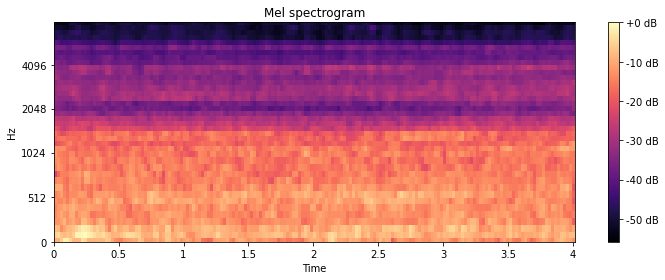

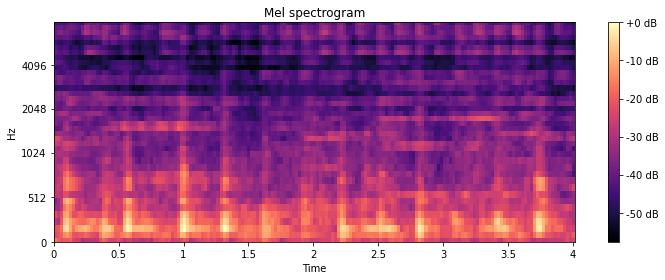

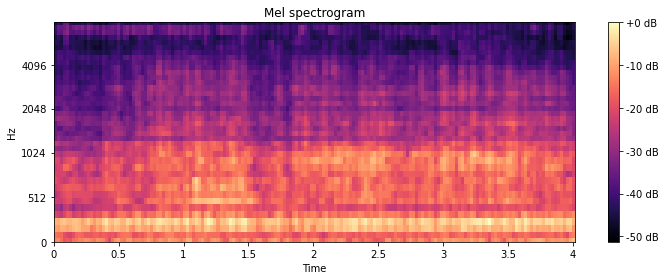

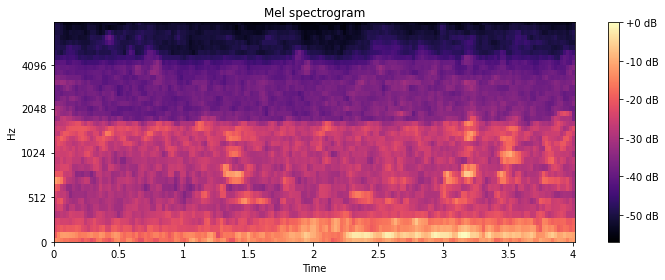

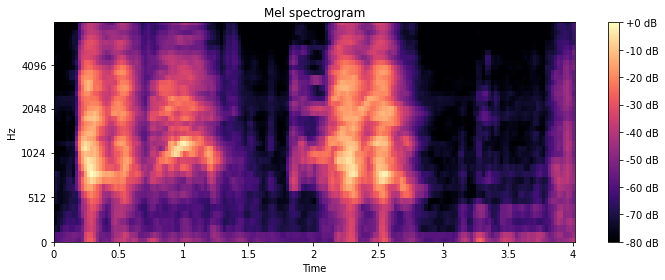

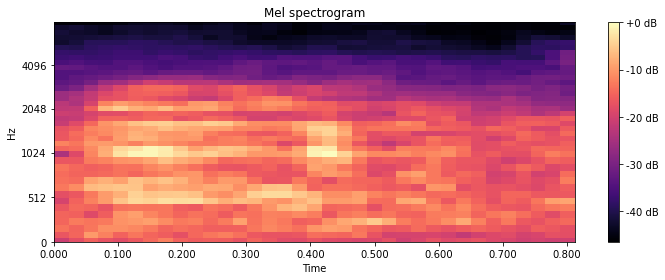

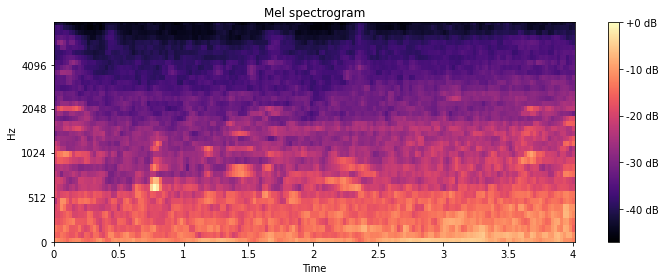

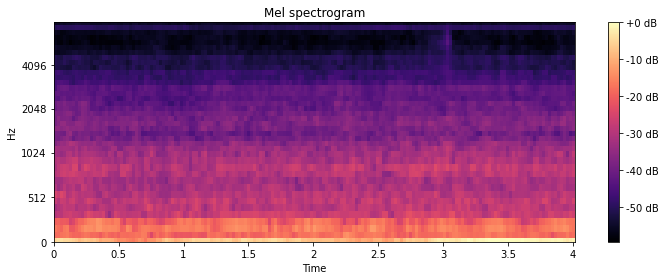

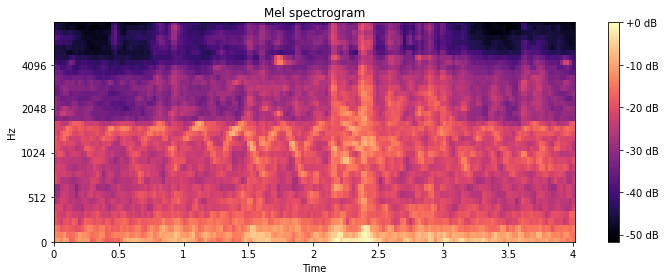

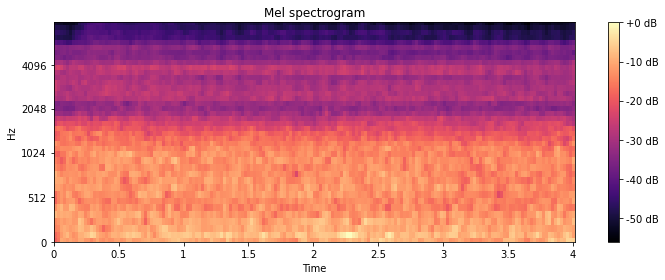

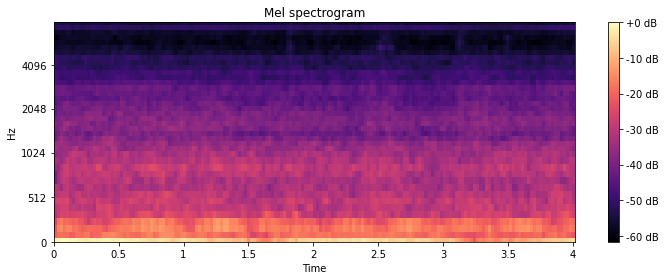

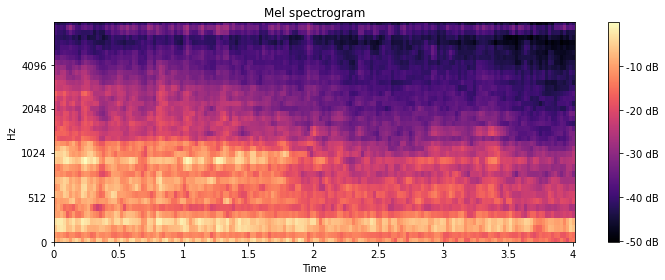

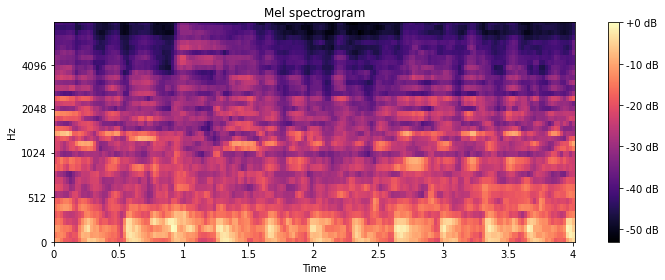

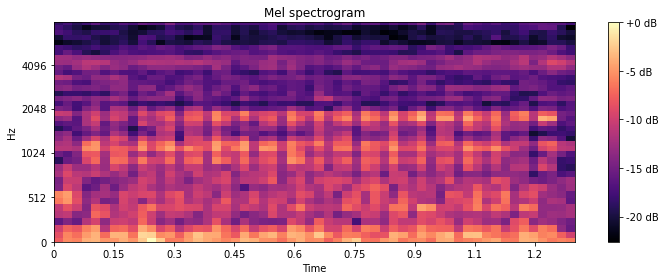

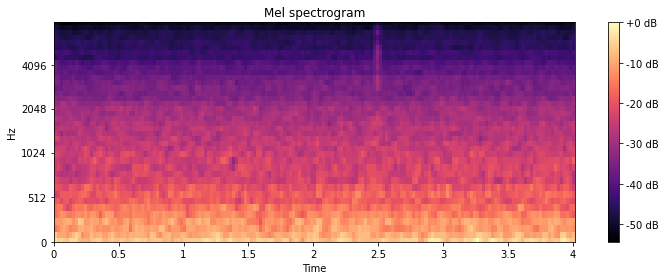

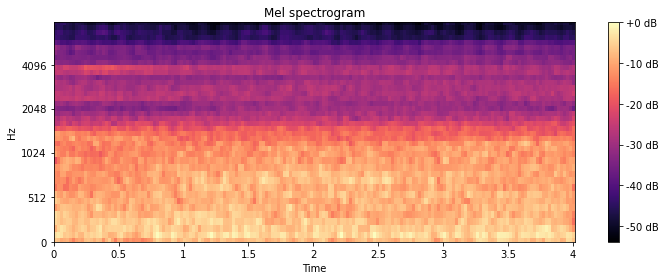

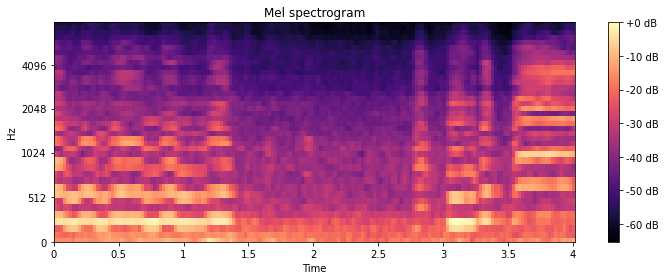

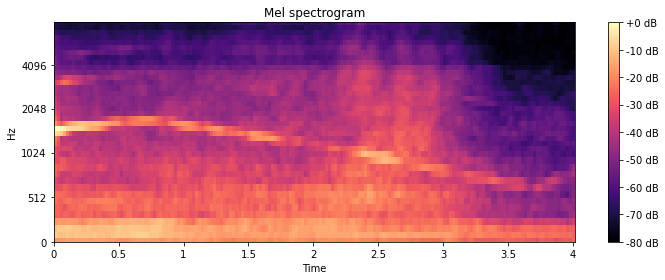

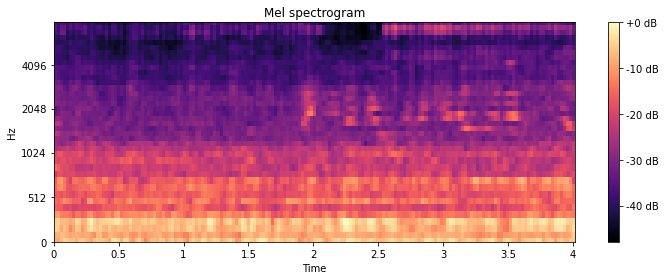

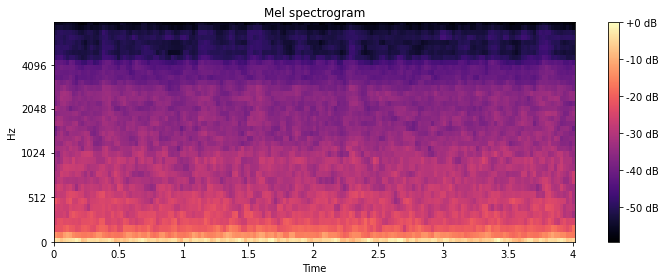

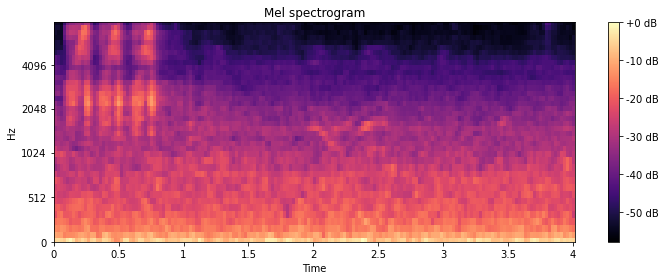

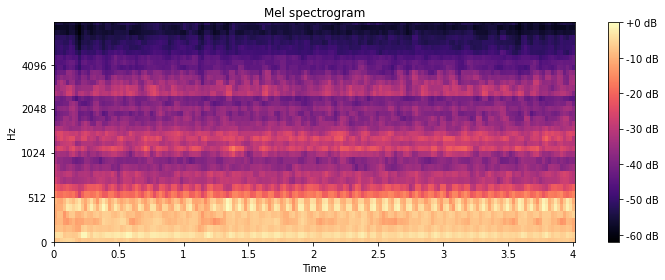

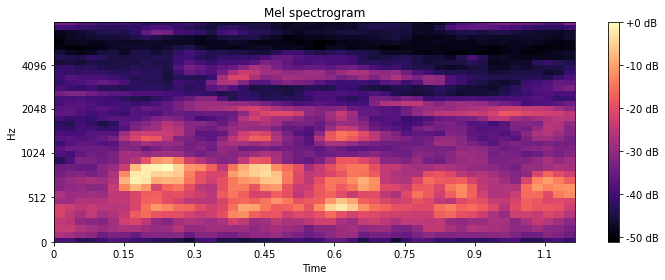

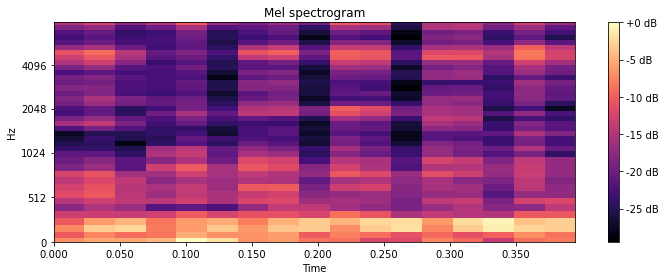

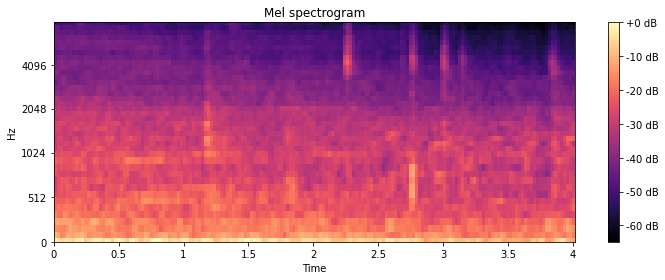

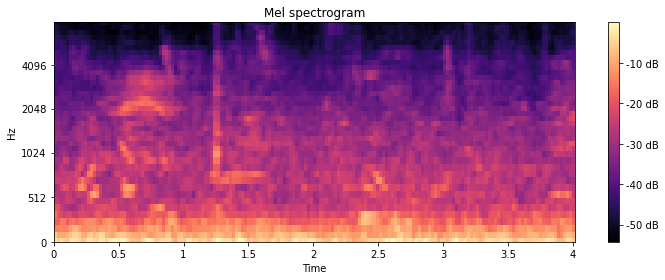

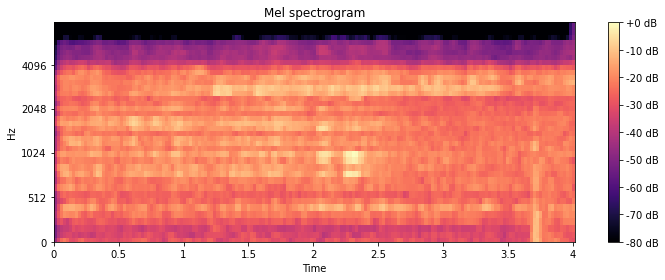

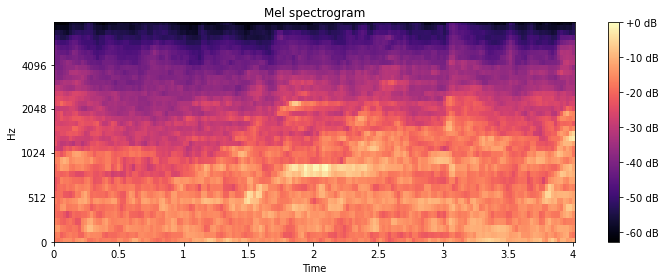

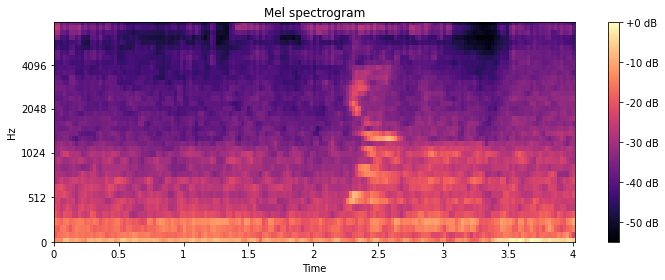

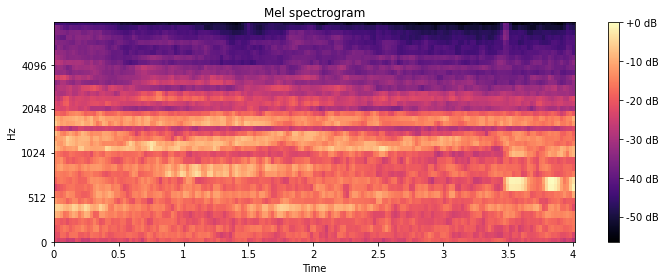

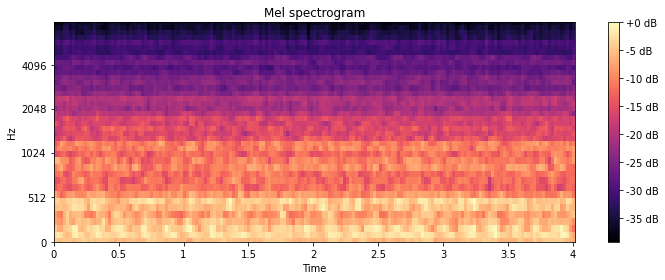

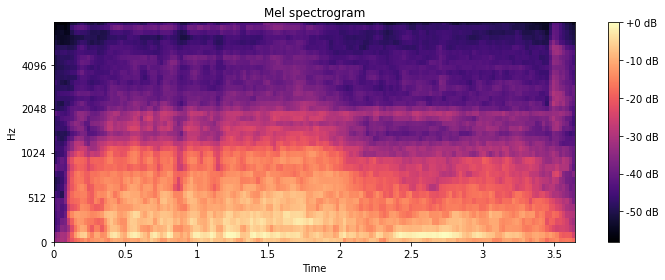

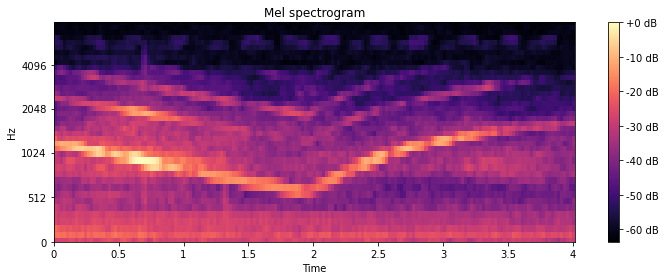

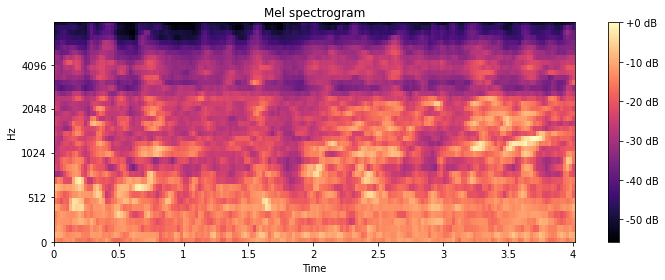

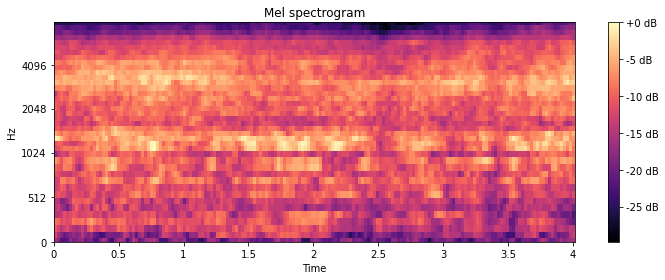

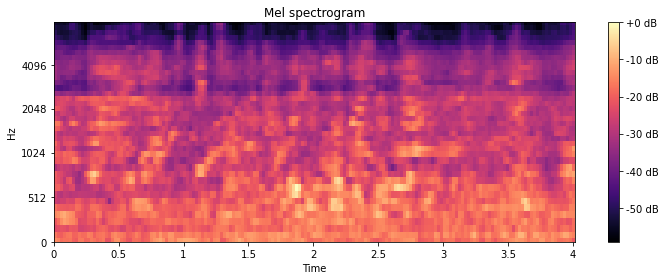

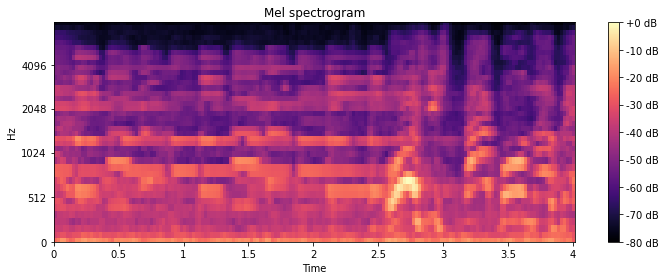

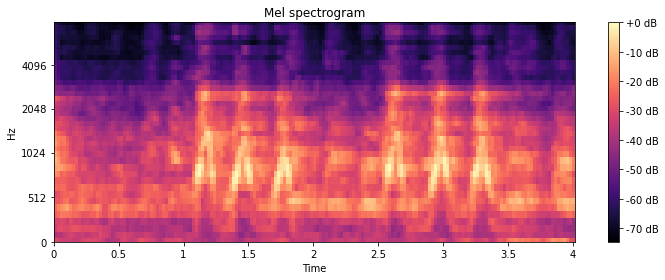

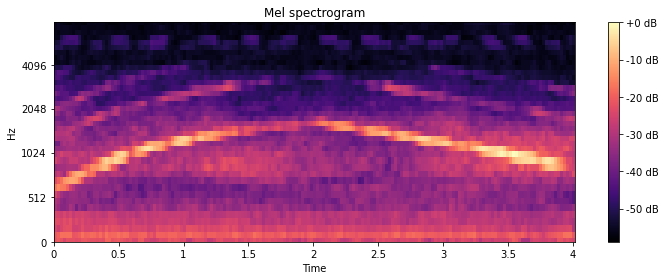

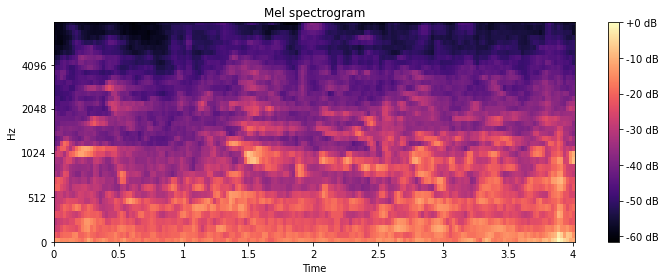

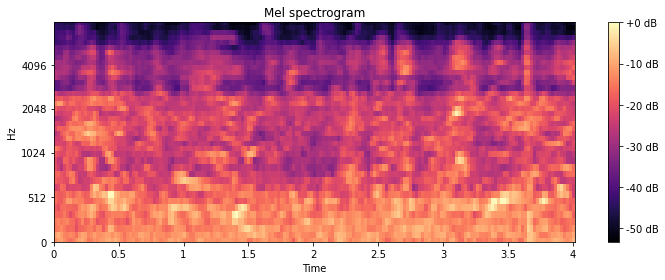

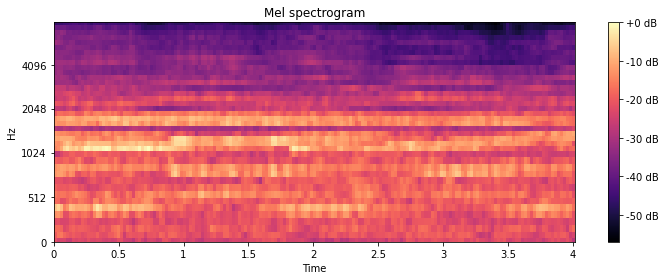

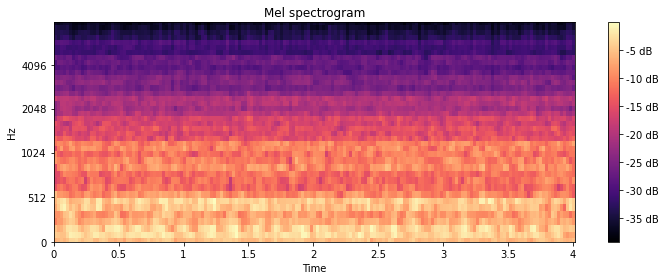

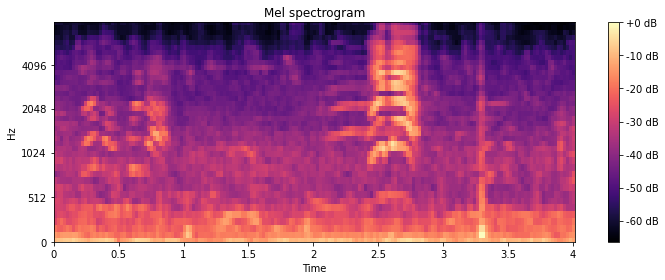

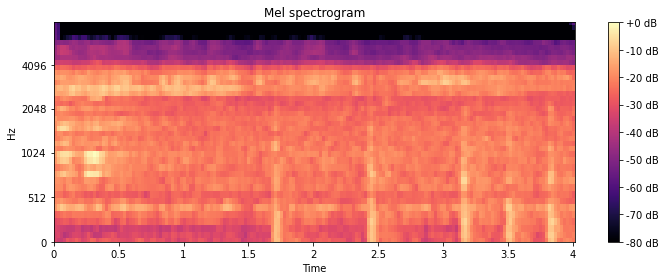

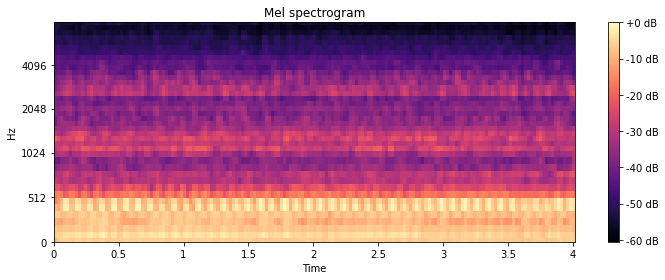

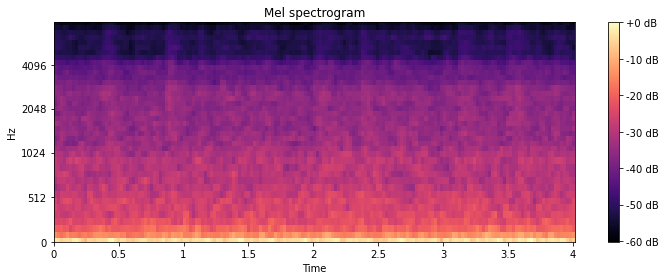

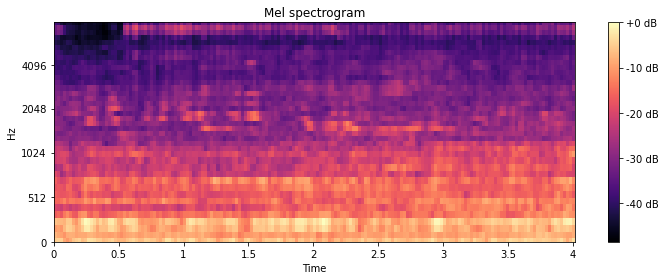

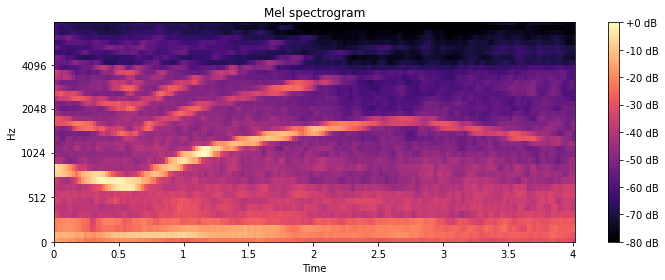

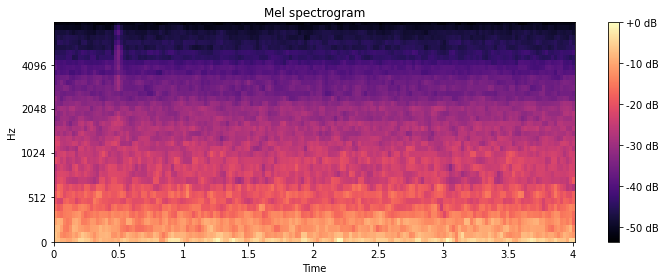

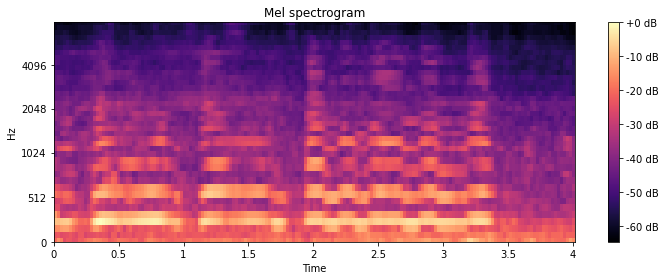

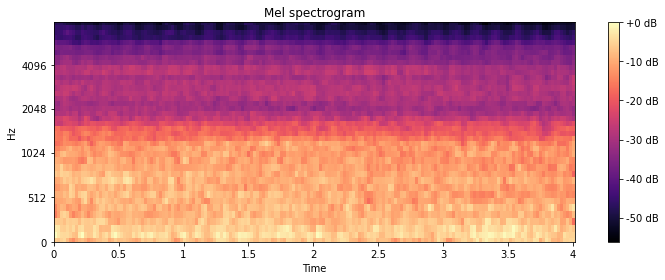

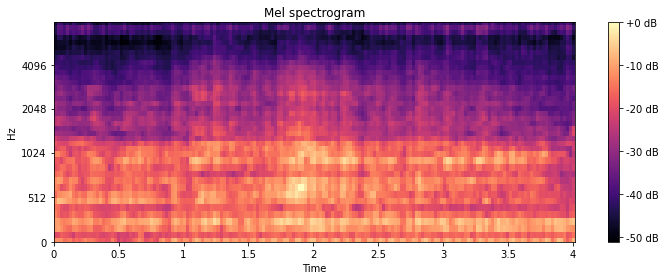

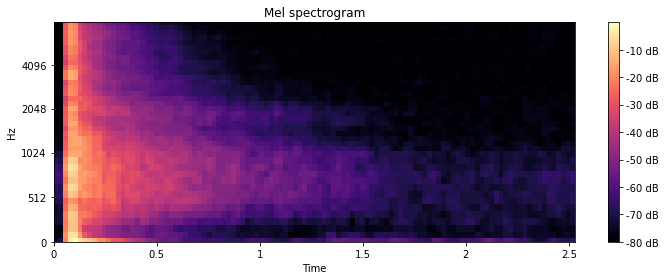

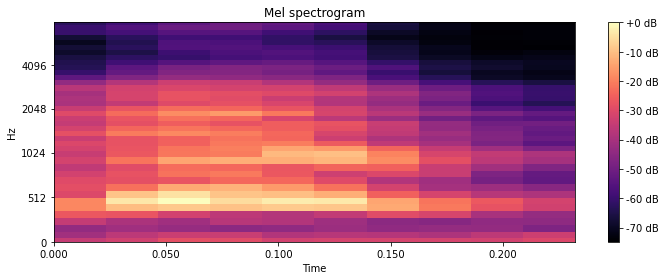

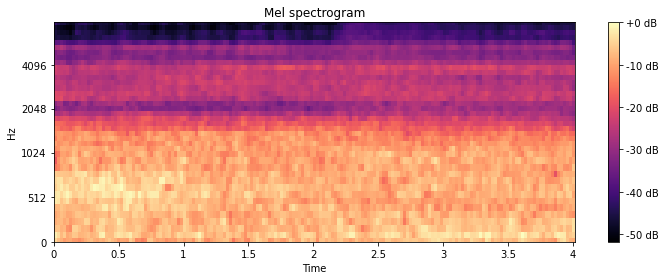

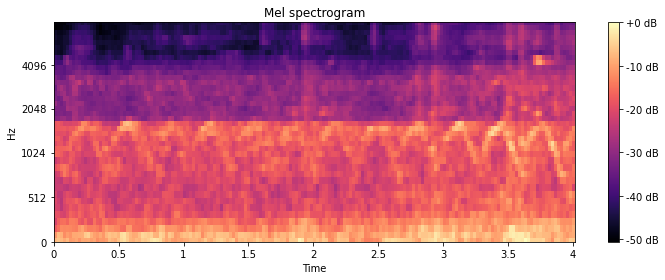

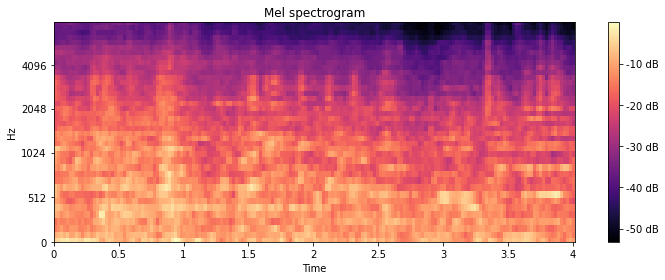

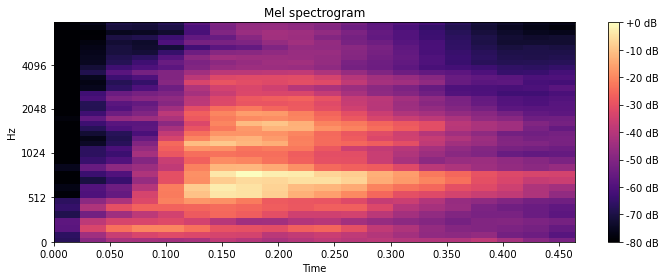

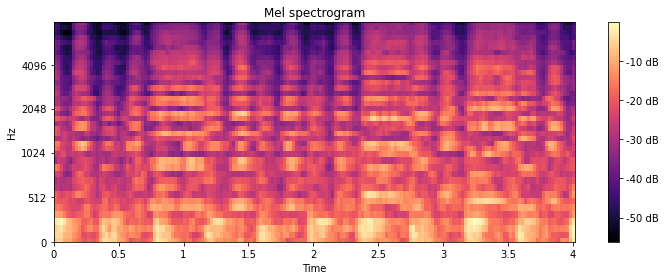

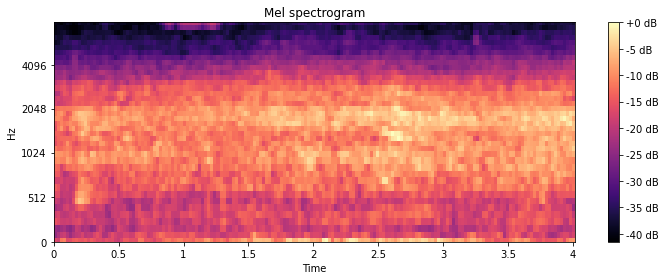

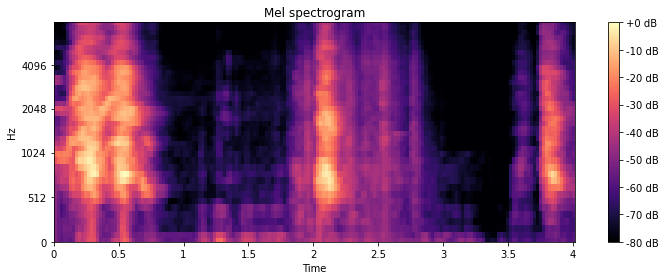

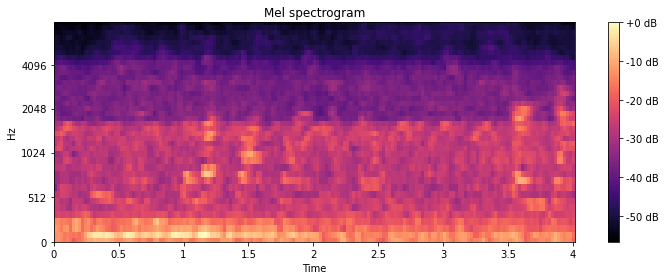

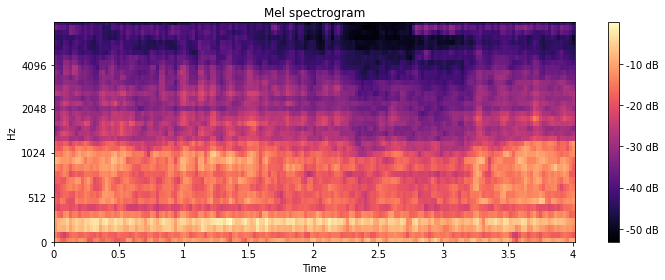

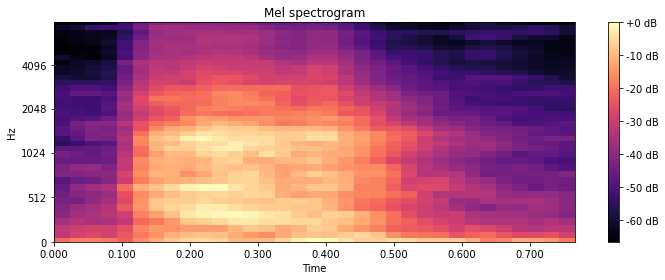

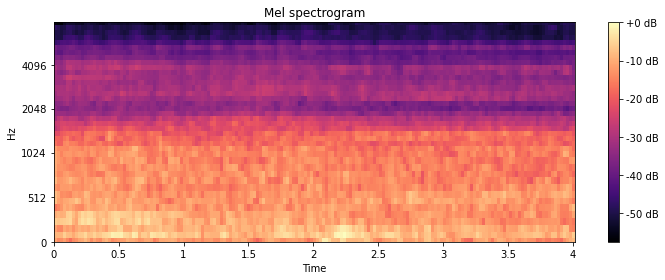

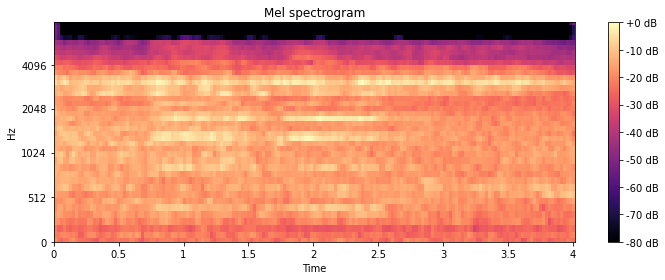

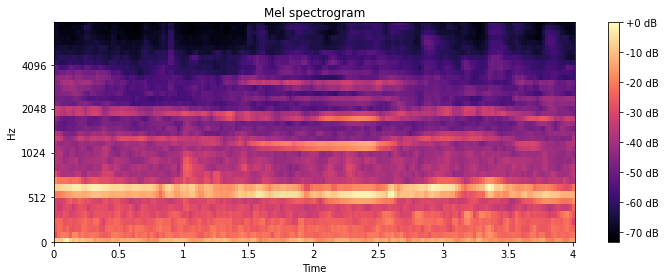

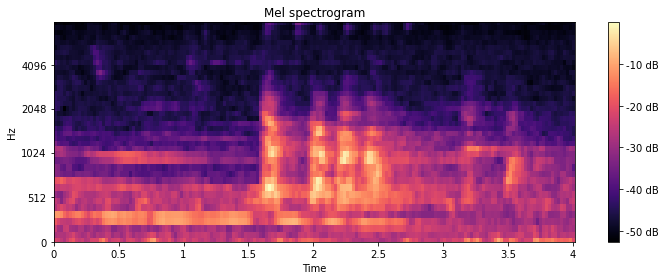

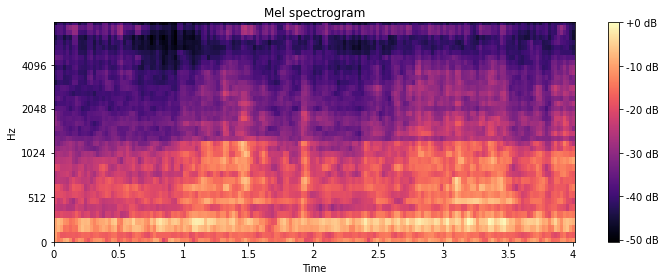

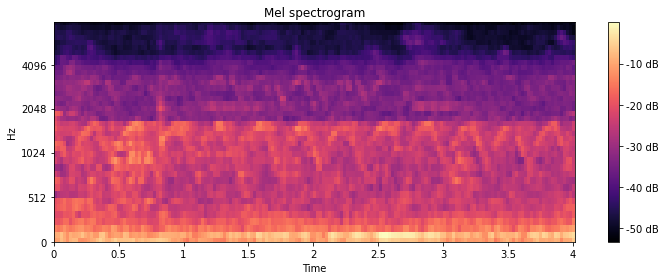

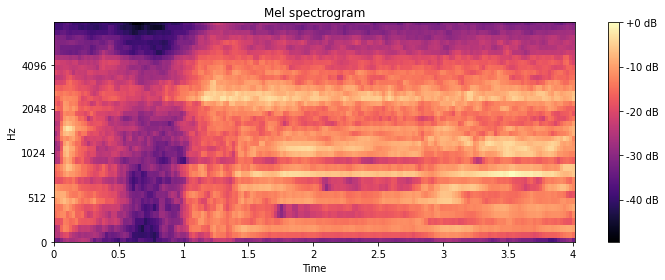

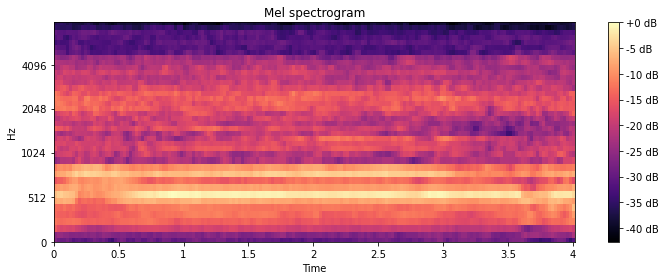

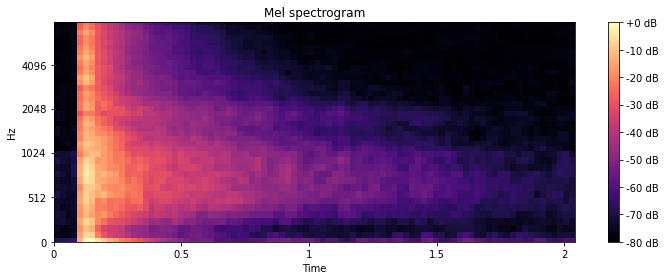

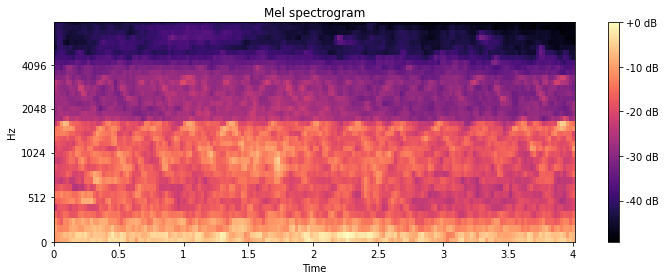

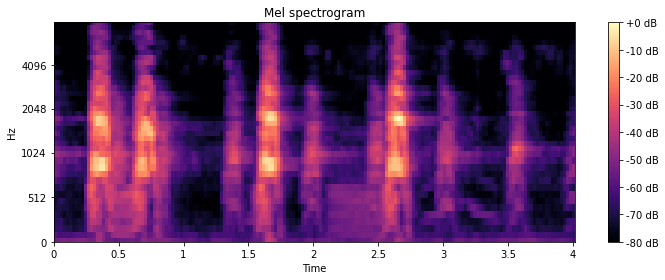

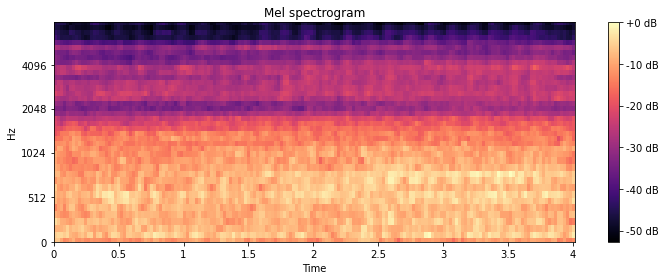

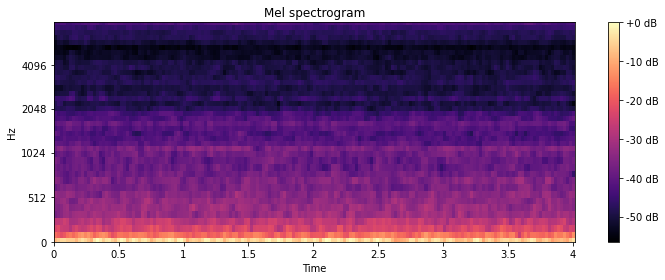

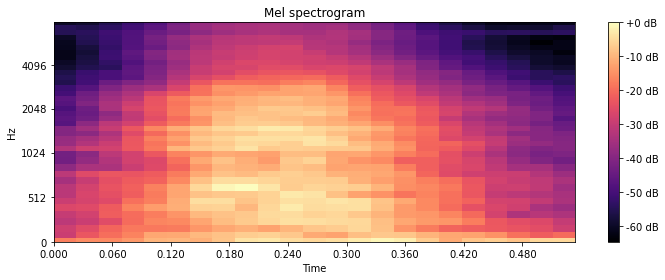

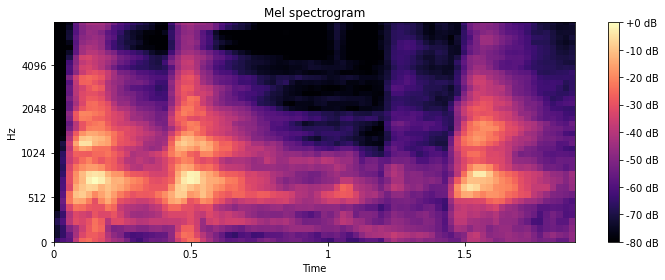

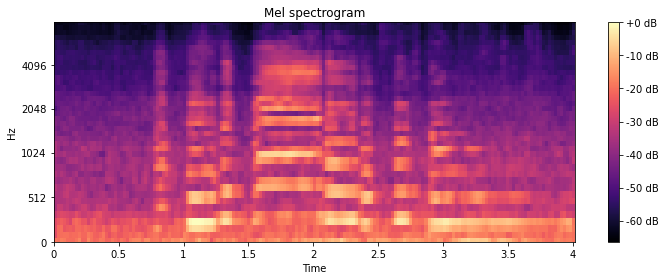

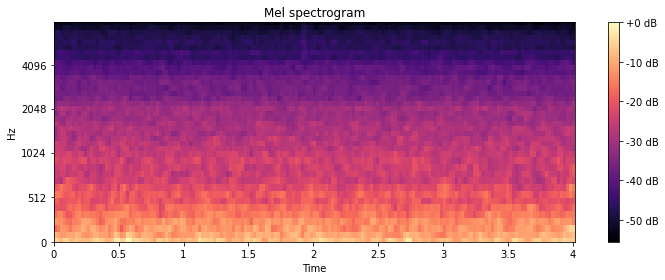

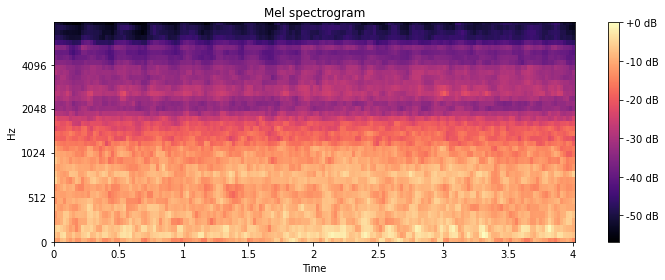

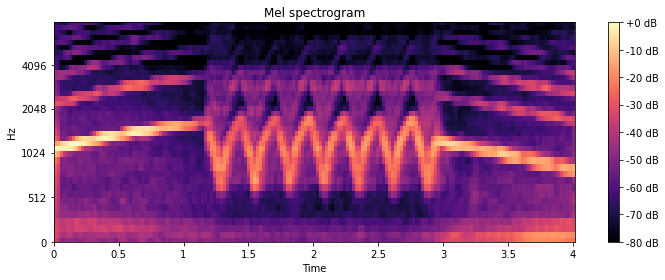

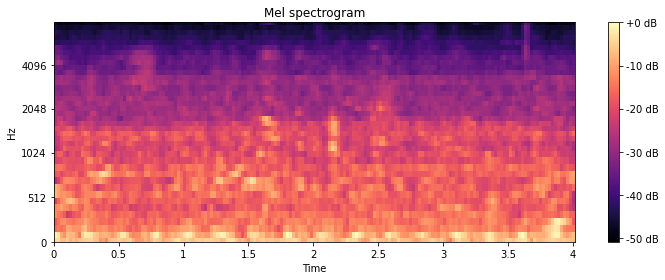

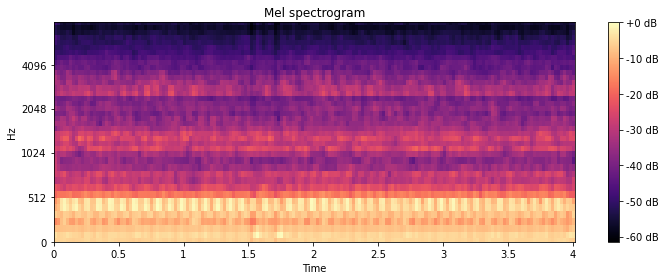

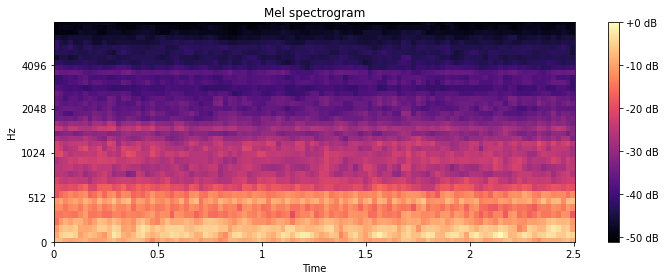

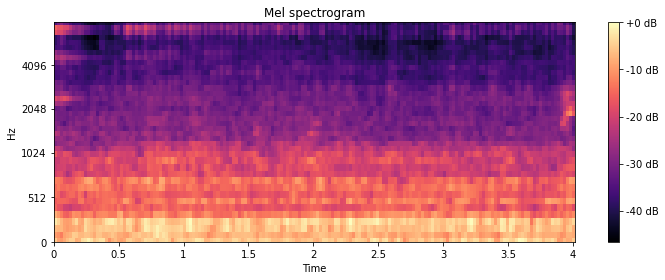

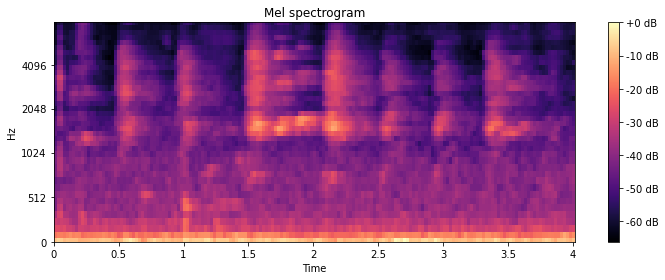

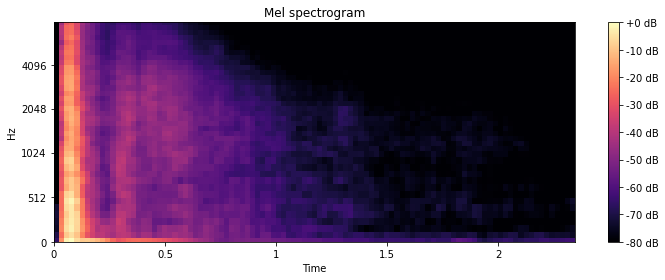

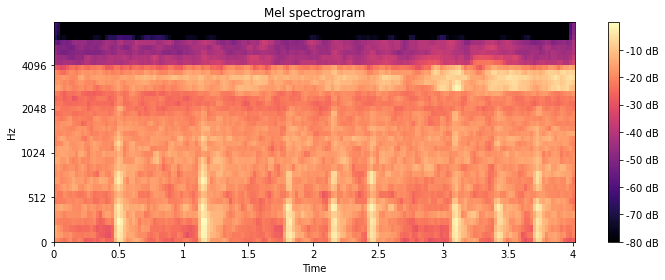

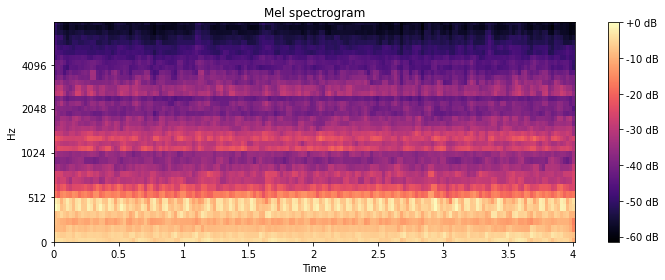

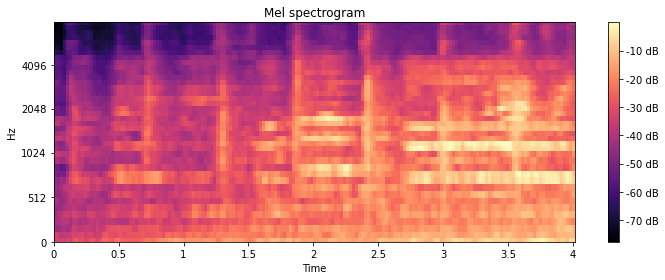

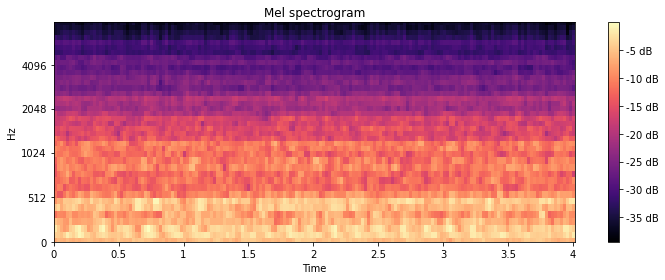

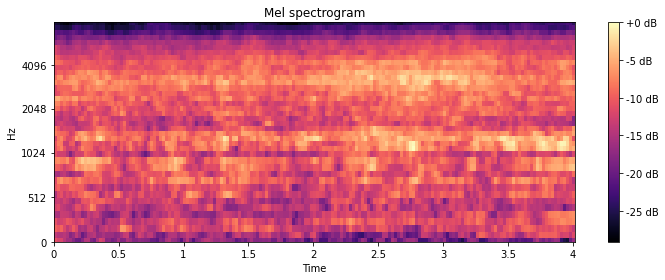

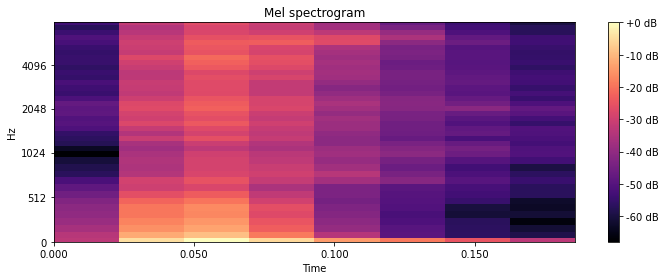

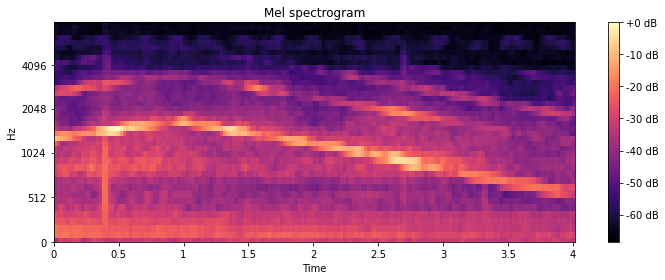

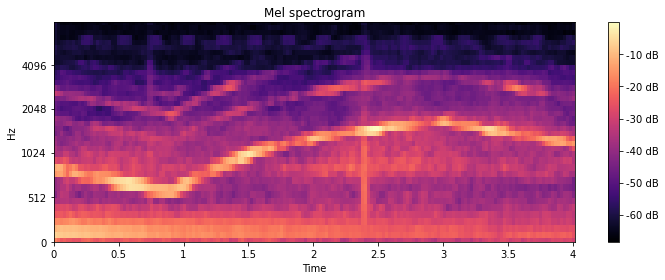

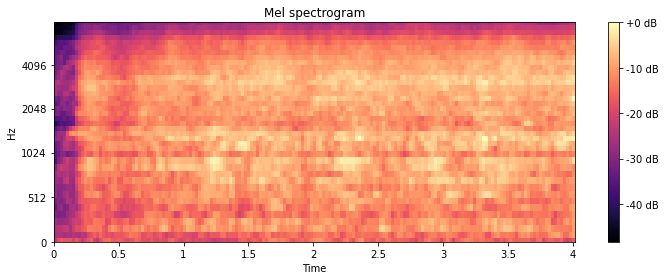

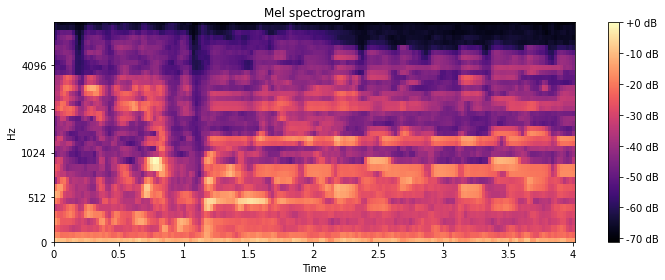

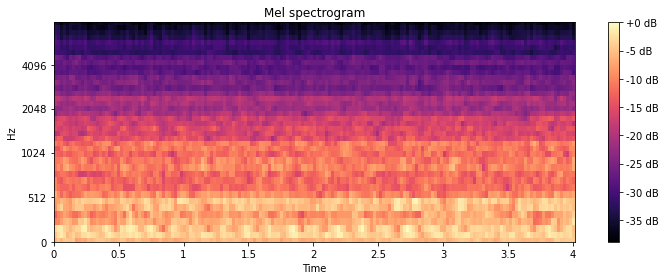

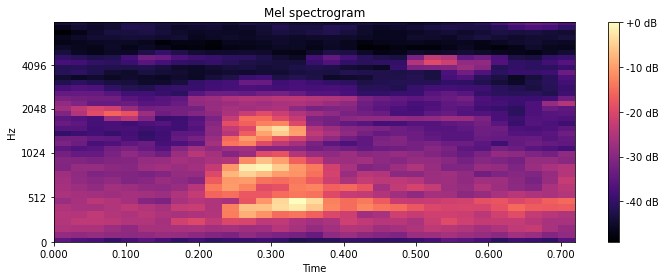

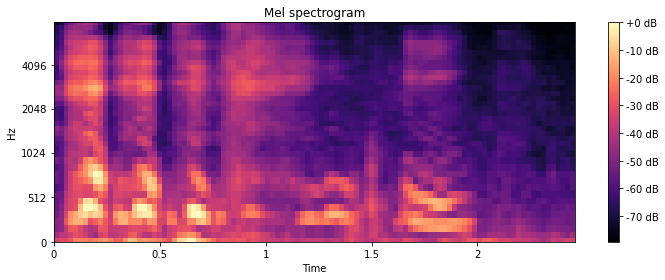

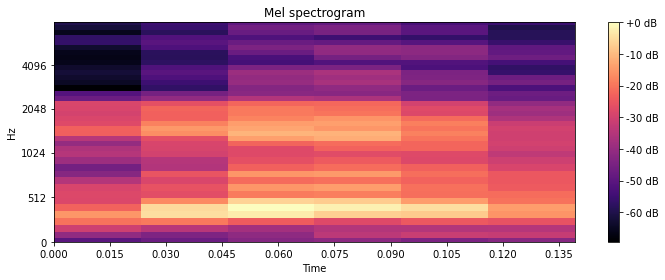

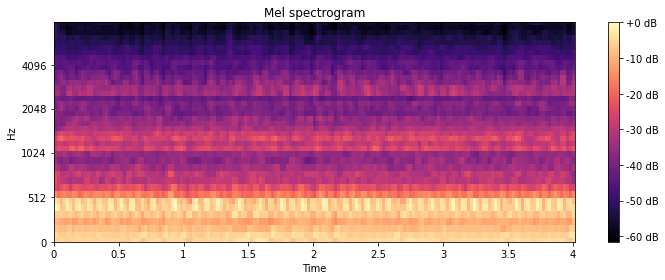

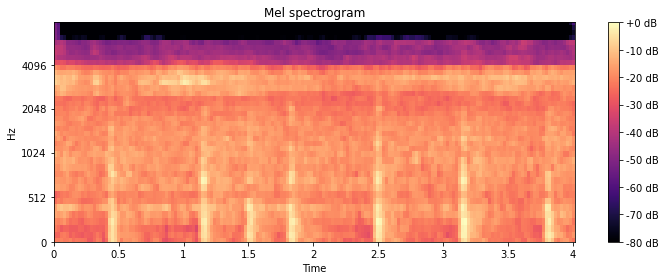

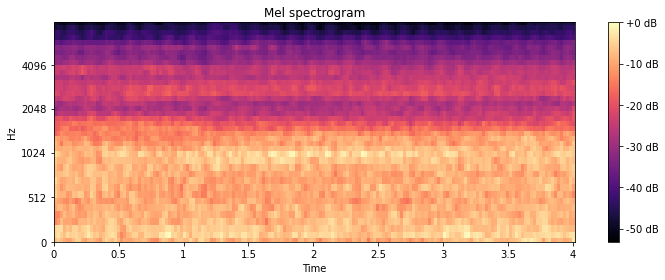

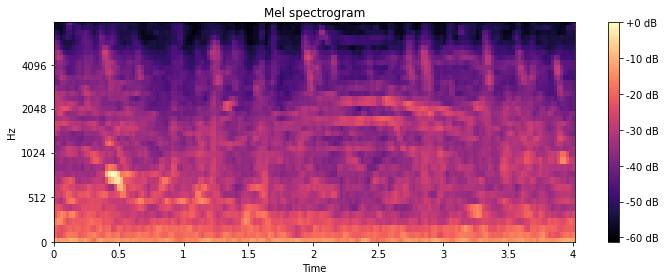

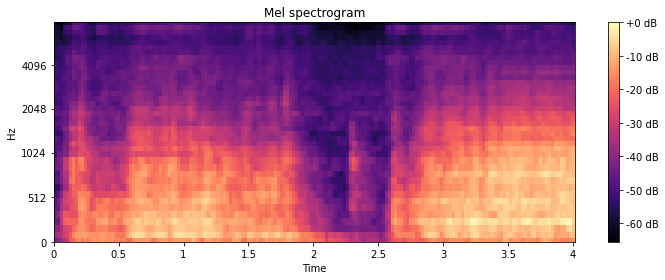

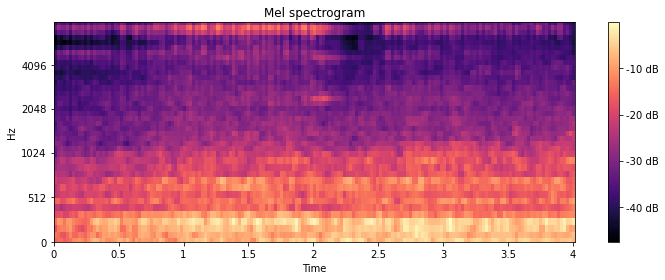

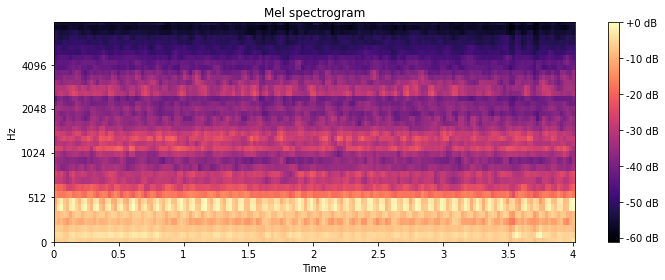

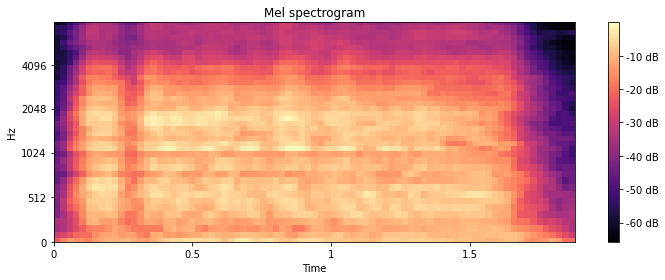

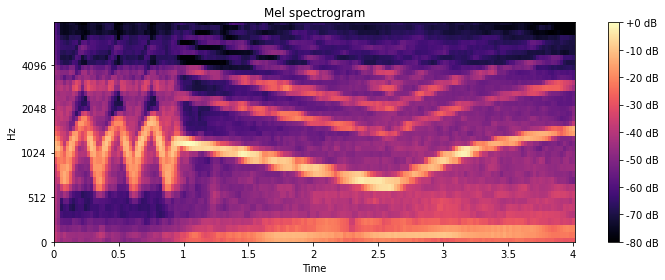

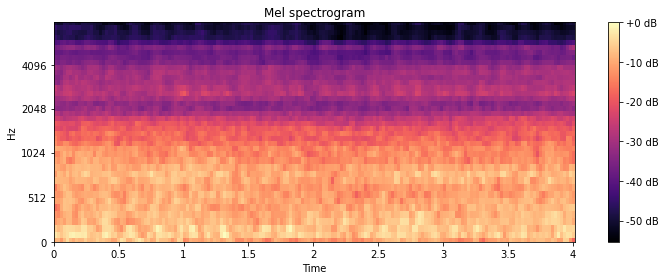

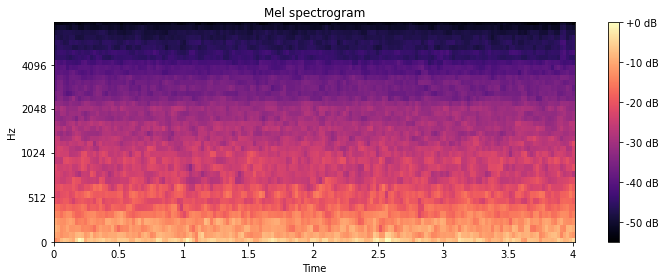

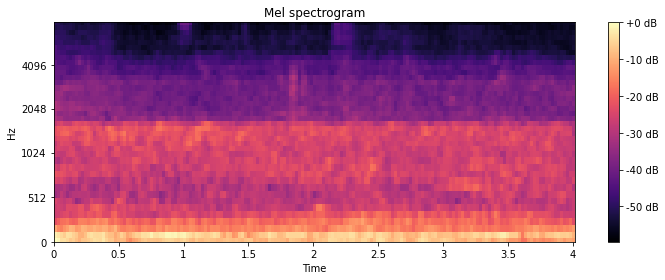

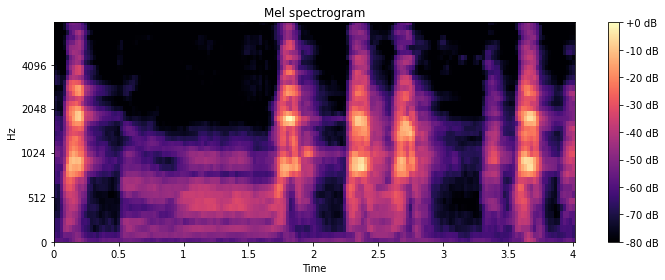

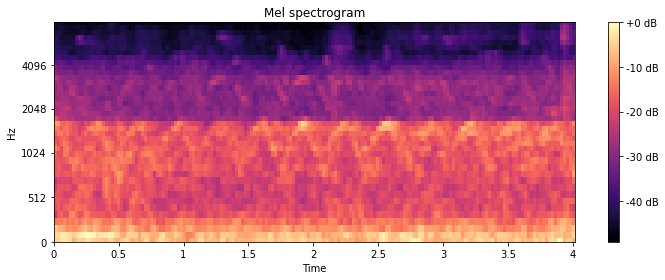

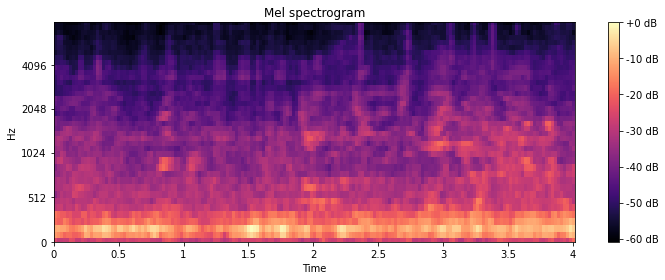

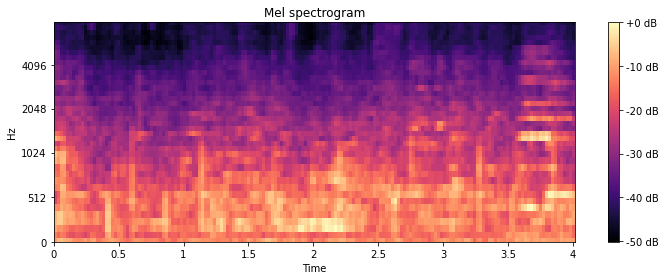

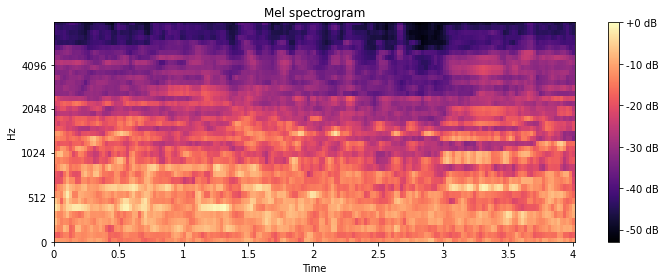

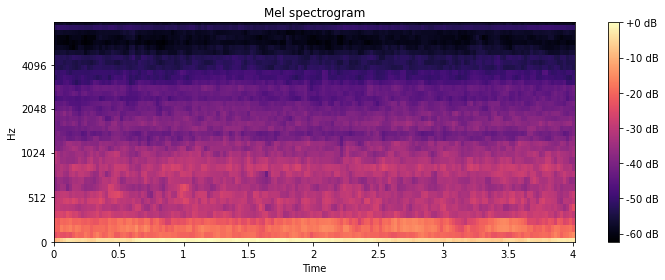

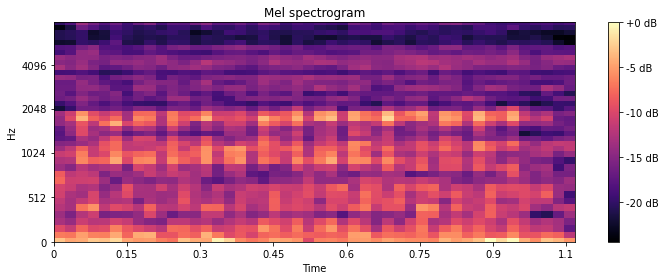

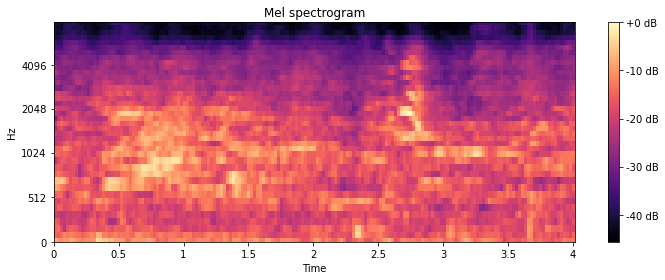

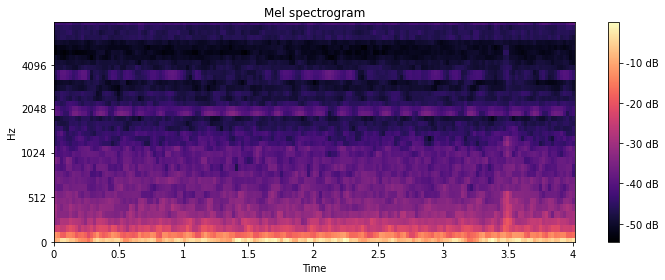

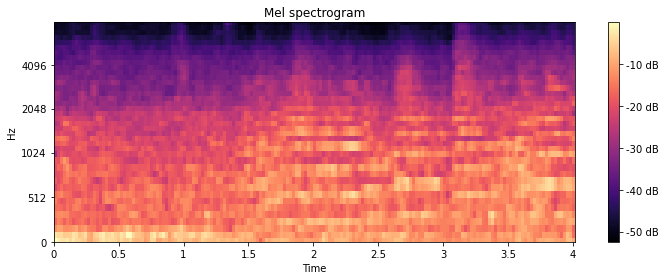

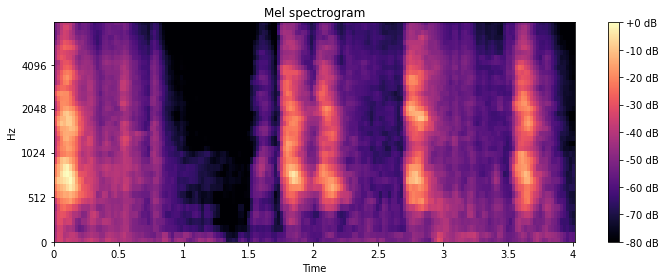

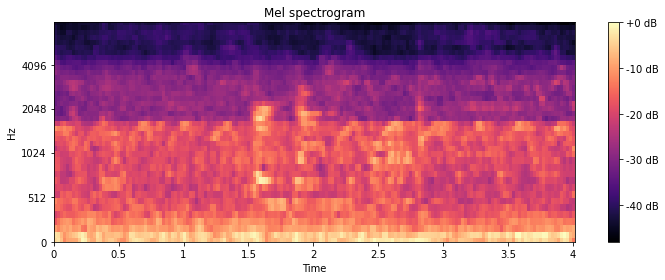

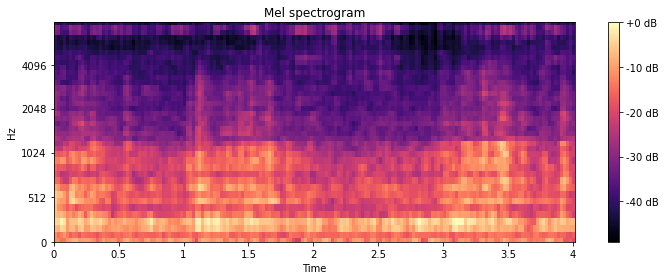

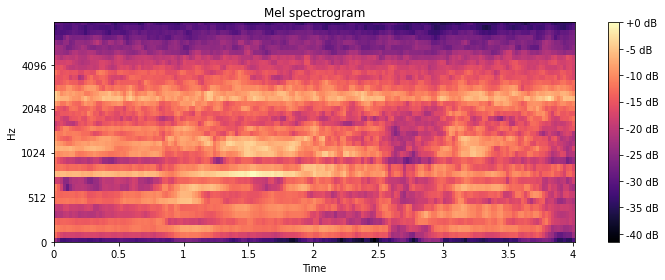

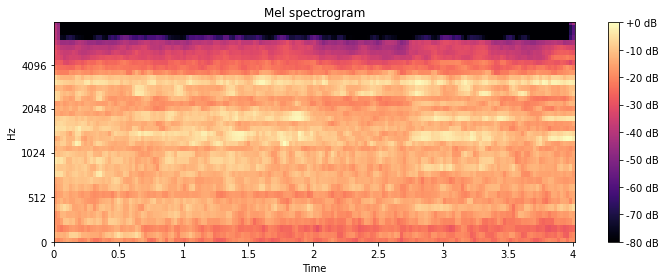

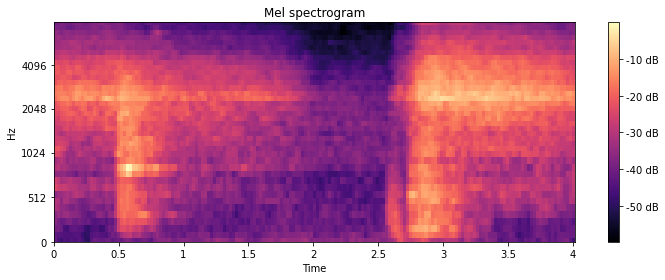

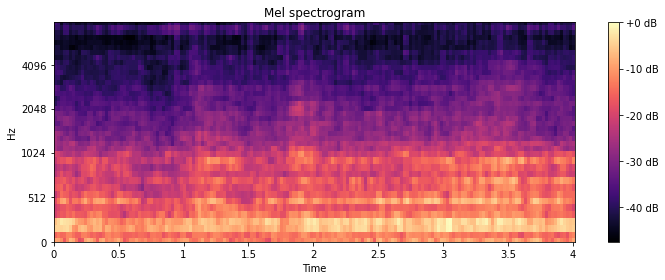

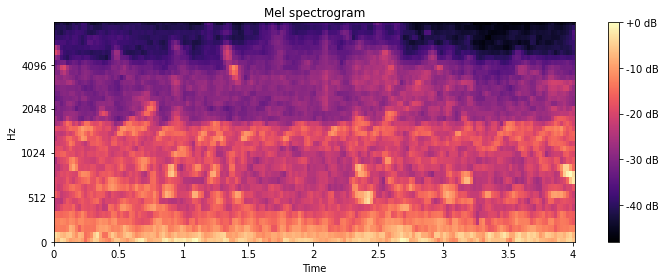

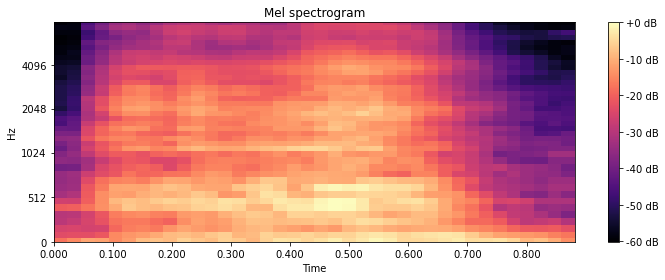

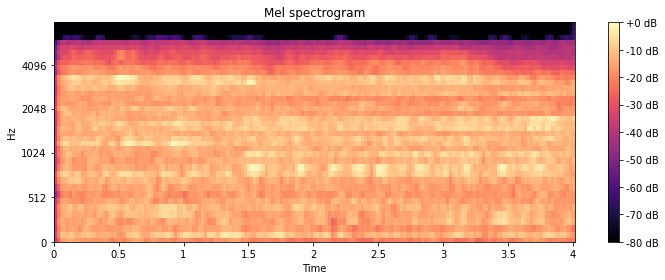

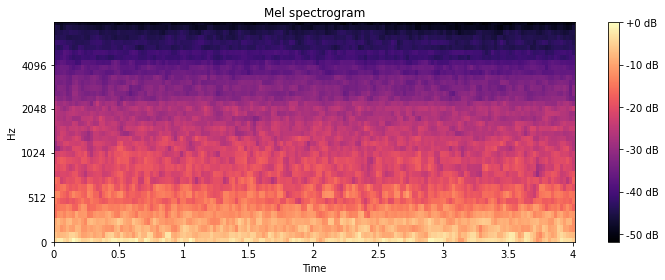

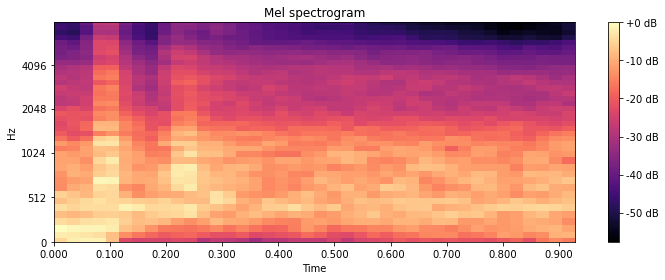

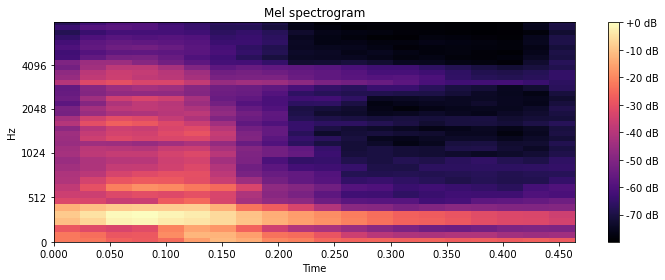

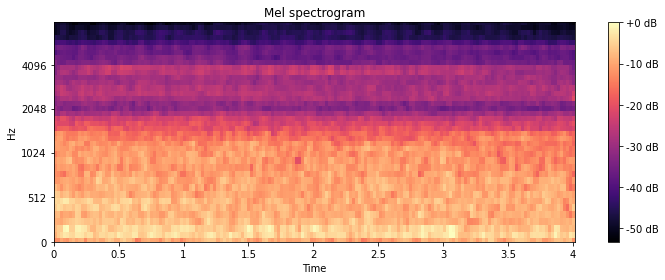

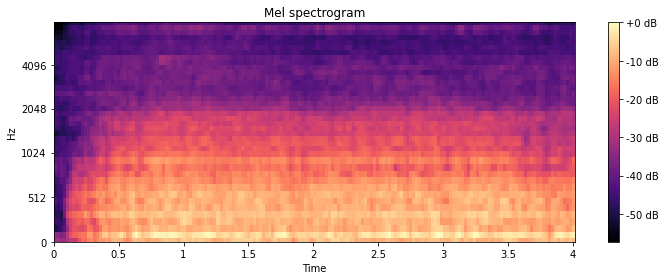

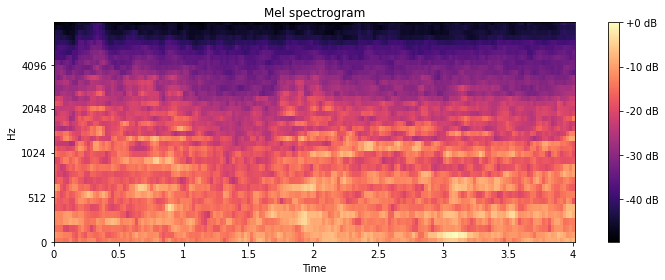

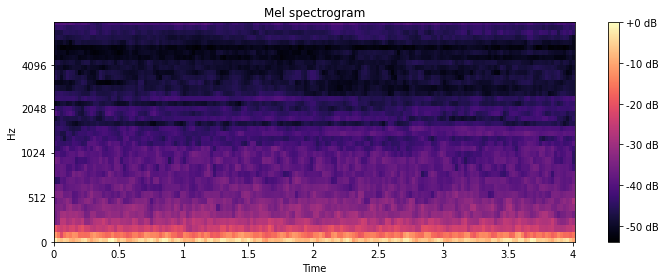

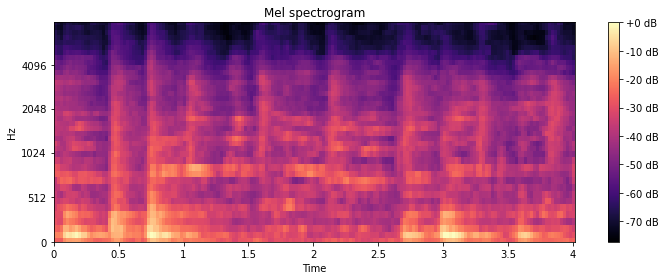

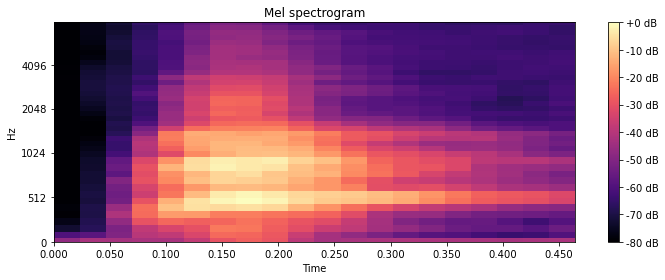

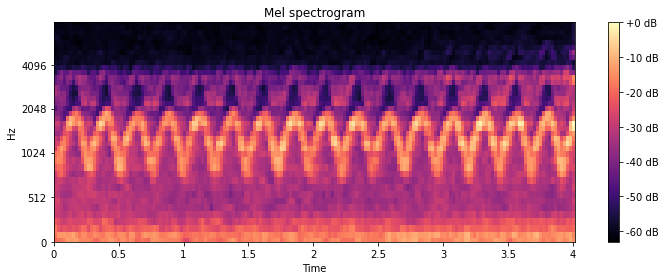

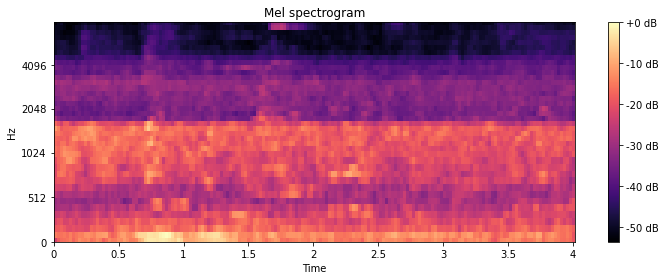

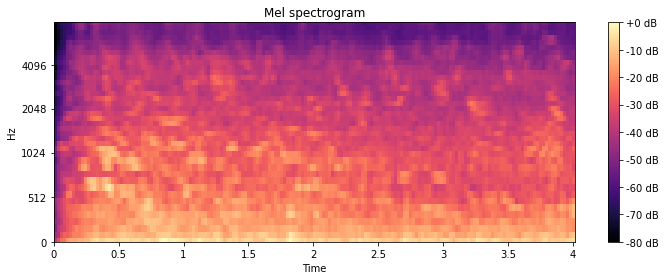

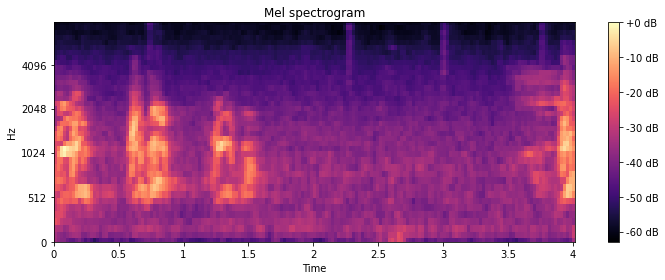

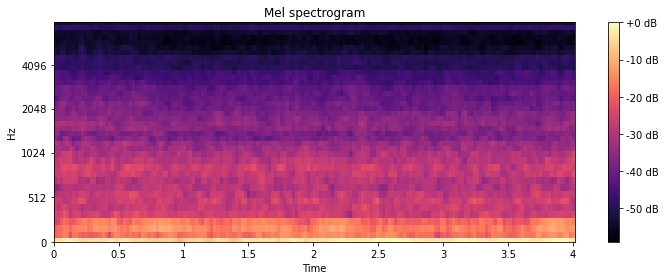

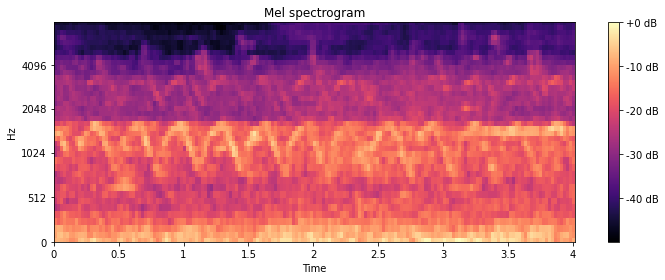

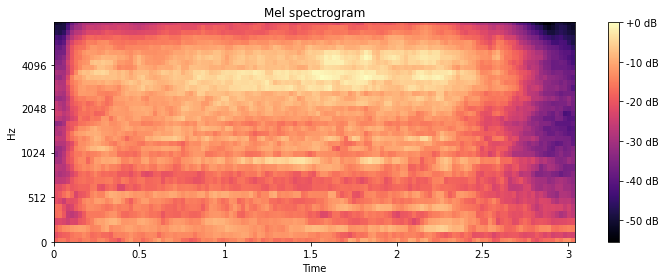

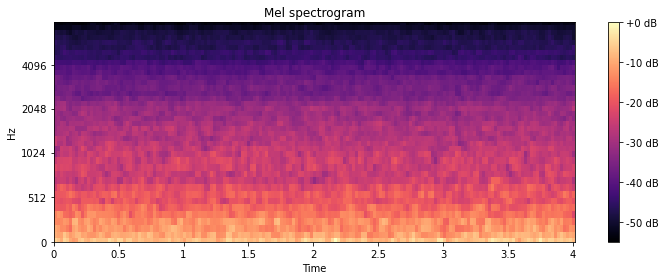

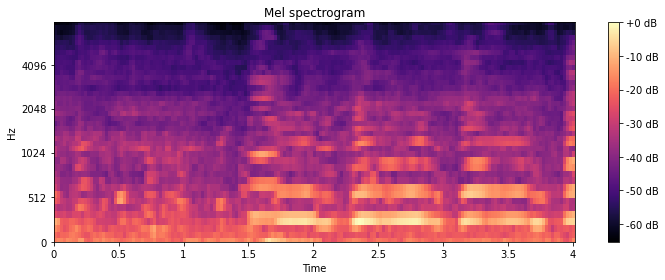

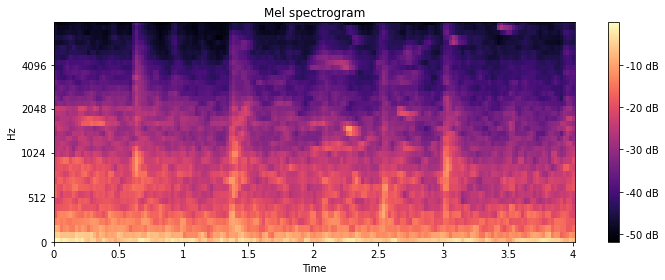

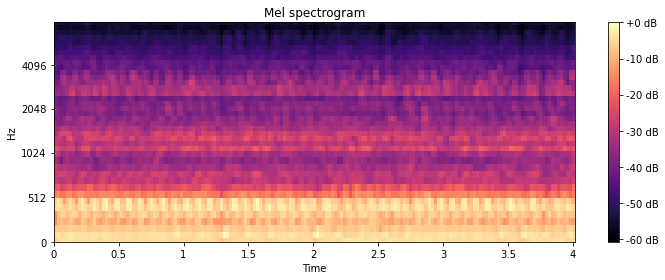

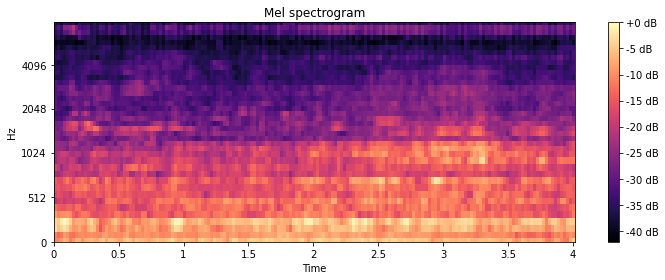

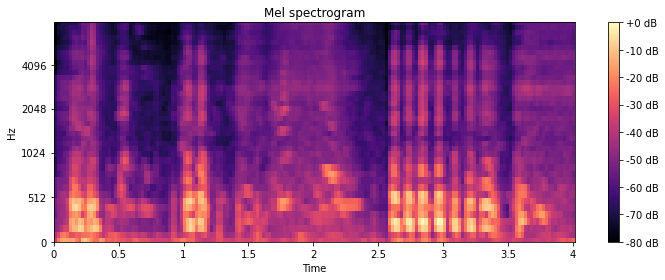

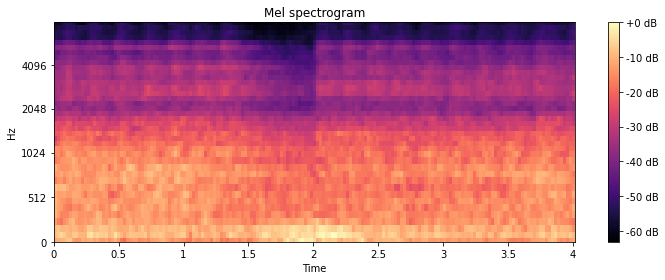

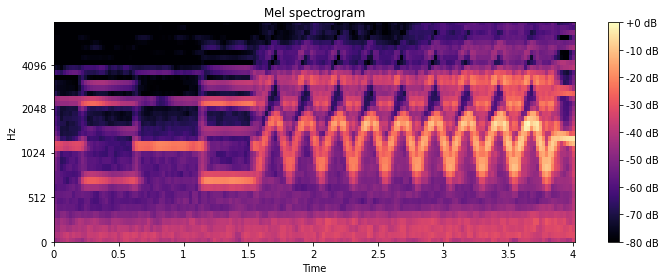

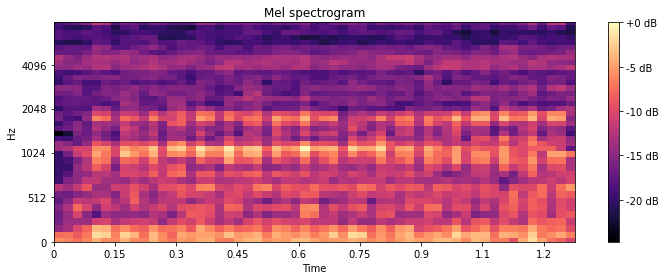

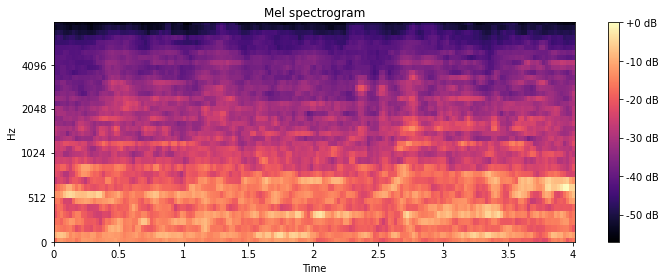

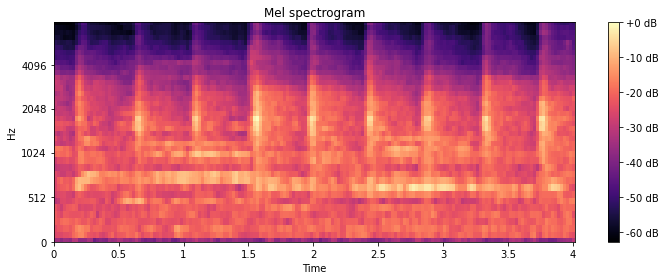

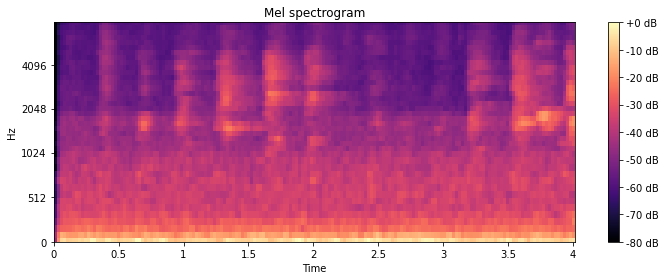

In [14]:
import sys
!{sys.executable} -m pip install librosa
import scipy.io 
from scipy.io import wavfile as wav
import pandas as pd
import librosa
from librosa import display
import numpy as np
import IPython.display as ipd 
from IPython.display import Audio
from glob import glob 
import matplotlib.pyplot as plt
!{sys.executable} -m pip install playsound
from playsound import playsound

import os

directory = r'/Users/dominikzeman/UrbanSound8K/audio'
directory_list = []

def list_filenames(directory):
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if f != '/Users/dominikzeman/UrbanSound8K/audio/.DS_Store':
            for filename in os.scandir(f):
                if filename.is_file():
                    directory_list.append(str(filename.path))
                    y,sr=librosa.load(filename.path)
                    mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
                    melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000)
                    plt.figure(figsize=(10,4))
                    librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
                    plt.colorbar(format='%+2.0f dB')
                    plt.title('Mel spectrogram')
                    plt.tight_layout()
        else:
            continue

print(list_filenames(directory))